### 라이브러리 및 데이터 불러오기

In [5]:
# 폰트 설정
'''!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf'''

'!sudo apt-get install -y fonts-nanum\n!sudo fc-cache -fv\n!rm ~/.cache/matplotlib -rf'

In [6]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

!apt-get install -qq fonts-nanum
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv("./preprocessed_review_data.csv", encoding='utf-8')
print(df.shape)
df.head(2)

(670, 5)


,category,reviews,keyword1,keyword2,keyword3
0,해산물요리,노포식당요즘 인기있는곳이래서 왔어요 주꾸미 삼겹 꽃게새우사리추가해서먹었는데요 양념맛...,음식이 맛있어요,친절해요,인테리어가 멋져요
1,고기요리,지나가는데 너무 예뻐서 술집인 줄 알았는데 알고 보니까 신촌 삼겹살 맛집이더라구요 ...,음식이 맛있어요,고기 질이 좋아요,친절해요


In [8]:
# 라벨인코딩

from sklearn.preprocessing import LabelEncoder

le_cat = LabelEncoder()
df[['category']] = df[['category']].apply(le_cat.fit_transform)

le_key1 = LabelEncoder()
df['keyword1'] = le_key1.fit_transform(df['keyword1'])

le_key2 = LabelEncoder()
df['keyword2'] = le_key2.fit_transform(df['keyword2'])

le_key3 = LabelEncoder()
df['keyword3'] = le_key3.fit_transform(df['keyword3'])

df.head(2)

,category,reviews,keyword1,keyword2,keyword3
0,10,노포식당요즘 인기있는곳이래서 왔어요 주꾸미 삼겹 꽃게새우사리추가해서먹었는데요 양념맛...,6,19,20
1,0,지나가는데 너무 예뻐서 술집인 줄 알았는데 알고 보니까 신촌 삼겹살 맛집이더라구요 ...,6,1,26


### 리뷰 데이터 정제

In [9]:
import re
def clean_review(review):
    # 한글과 공백만 빼고 제거
    review = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '', review)

    # 'ㅋㅋㅋ', 'ㅎㅎㅎ', 'ㅠㅠ', 'ㅜㅜ' 같은 단어들 제거
    review = re.sub(r'ㅋ+','',review)
    review = re.sub(r'ㅎ+','',review)
    review = re.sub(r'ㅠ+','',review)
    review = re.sub(r'ㅜ+','',review)

    # 불필요한 공백 제거
    review = review.strip()
    review = re.sub(r'\s+', ' ', review)
    return review

df['clean_reviews'] = df['reviews'].apply(clean_review)
df['clean_reviews'][0]

'노포식당요즘 인기있는곳이래서 왔어요 주꾸미 삼겹 꽃게새우사리추가해서먹었는데요 양념맛이깊이가있어서 볶음밥까지너무맛나네요퐁듀치즈에찍어먹었는데 천상의맛이네요 양도푸짐해서남은것들도 따로포장해서 사장님이챙겨주셨는데요 진짜 맛난거먹이고픈 엄마마음느꼈네용 감사드려요 쭈꾸미가 너무 먹고싶어서 온 신촌 역시 기대를 저버리지 않고 핵존맛 입니다 점심특선으로 먹었는데 가격 착하고 쭈꾸미 좋아하는 우리 여친느님께요 대만족을 하셨습니다 또한 볶음밥 하트로 해주시는데 너무 맛있고 좋아요 술도 싼데 점심이라 패스 진짜 좋아요 다음에 또올께요 집근천데 처음가봄 쭈삼 기본셋팅 홍합 콘치즈 계란까지 알차게 맛있어요 쭈꾸미삼겹 먹었는데 무난무난 맛있어요 볶음밥이 별미입니다 계란찜두 보들거려서 맛있게 먹렀더니 직원분이 리필해쥬셨어요 처음 생겼을때부터 다녔으니까 아마 년은 되었나봐요 이렇게 오랫동안 맛집을 유지하는건 역시나 맛이 있어서 그렇겠지요 가게 인테리어도 옛날 감성으로 정감있고 멋있어요 직원분들도 친절하고 여전히 쭈꾸미 맛있어요 국물이 마법 소스 같은데 국물 너무 얼큰하고 매콤하고 계속 끌리는 마성의 맛 요즘은 물가가 올라서 예전에는 날치알을 주셨는데 지금은 마요네즈를 주신다고 날치알도 맛있었지만 쭈꾸미가 매콤하니 마요네즈 소스를 날치알 대신 얹어 먹어도 매운맛이 중화 되어서 괜찮더라구요 반찬같은 경우는 셀프바가 있어서 직원들 안불러도 편하게 리필해서 먹을 수 있어서 그게 더 좋은것 같아요 계속 갈꺼니까 계속 장사해주세요 이번에도 잘 먹고 갑니다 쭈꾸미가 탱글탱글하고 양도 많고 구성도 알찼어요 적당히 매콤해서 맵찔이도 맛있게 먹을 수 있었습니다 볶음밥에는 치즈랑 계란을 같이 넣고 볶아주시는데 이게 별미네요 사장님께서도 정말 친절하십니다 쭈꾸미도 크고 싱싱하고 양도 많아요 달걀찜도 무한리필이고 야채 셀프바도 있어서 푸짐하고 맛있어요 가게 컨셉이 년대 감성이어서 타임머신타고 과거로 간것 같고 재미있어요 년 이상 신촌맛집으로 생방송에도 방송되었어요 강추합니다 맛 있어요 추가 반찬도 직접 가져다

### 토큰화
- Konlpy의 Okt

In [25]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 46.0 MB/s eta 0:00:00


In [9]:
from konlpy.tag import Okt
from tqdm.notebook import tqdm
okt = Okt()  # 선언

# Okt 형태소 분석
reviews = []
for review in tqdm(df['clean_reviews']):
    tokenized_review = okt.morphs(review, stem=True)  # stem=True로 어간추출까지 진행
    reviews.append(tokenized_review)

df['tokenized_reviews'] = reviews
print(df['tokenized_reviews'][1])

  0%|          | 0/670 [00:00<?, ?it/s]

['지나가다', '너무', '예쁘다', '술집', '인', '줄', '알다', '알', '고', '보', '니까', '신촌', '삼겹살', '맛집', '이', '덥다', '고기', '도', '직접', '다', '굽다', '주시', '고', '한기', '곁들이다', '먹다', '수', '있다', '소스', '나', '반찬', '도', '너무', '맛있다', '특히', '분위기', '가', '너무', '예쁘다', '계획', '없이', '와도', '술', '이', '술술', '들어가다', '거', '같다', '분위기', '예요', '정말', '맛있다', '고기', '를', '먹다', '수', '있다', '곳', '이에요', '고기', '퀄리티', '도', '좋다', '수준', '높다', '그', '릴링', '서비스', '로', '딱', '맞다', '굽다', '정도', '로', '고기', '를', '제공', '해주다', '속', '은', '촉촉하다', '겉', '은', '바삭', '한', '삼겹살', '이에요', '들기름', '막국수', '는', '꼭', '들다', '후회', '없다', '정신없이', '먹다', '사진', '은', '못짹었', '고', '둘이서', '삼겹', '항정', '먹다', '맛', '점', '서비스', '점', '점', '거의', '완벽하다', '양', '갈비', '처럼', '바', '테이블', '에', '화로', '가', '있다', '직원', '분', '께서', '굽다', '다낭', '가다', '귀국', '후', '한식', '이', '너무', '땡기다', '찾아오다', '정말', '맛있다', '다만', '열사병', '에', '걸리다', '더위', '먹다', '정신', '못', '차리다', '있다', '그걸', '캐치', '하다', '정말', '스윗', '하다', '얼음', '도', '챙기다', '선풍기', '도', '꺼내다', '배려', '가', '넘치다', '고기', '도', '맛있다', '여기', '솥밥', '이라', '고기랑', '밥',

### 불용어 제거

In [10]:
# 한국어 불용어 리스트 파일 불러오기
with open("./stopword.txt", 'r', encoding='utf-8') as file:
    stop_words = file.readlines()

# 각 불용어 뒤에 있는 '\n' 제거
stop_words = [word.strip() for word in stop_words]
print(stop_words[:10])

# 토큰의 빈도 수 확인
from collections import Counter
all_reviews = [review for sublist in df['tokenized_reviews'] for review in sublist]
word_freq = Counter(all_reviews)
word_freq_200 = word_freq.most_common(200)

# 결과 확인을 위해 txt 파일로 내보내기
with open('word_freq_200.txt', 'w', encoding='utf-8-sig') as file:
    for item in word_freq_200:
        file.write(f"{item}\n")
print("완료")

# 불용어 추가
add_stop_words = ['도','하다','이','에','가','너무','있다','은','는','이다','오다','보다','을','같다','로','으로','방문','들','다','를','가다','한','진짜','님','의','곳','에서','것','수','정말','않다','하고','들다','요','랑','과','없다','또','되다','넘다','때','안','만','와','싶다','더','고','까지','분','이에요','나','이랑','적','많이','여기','인데','이라','다음','인','제','꼭','처음','자주','엄청','저','분들','하나','라','게','완전','그리고','서','그','정도','나다','잘','좀','주다','에는','특히','되어다','거','엔','두','부터','아주','에도','그렇다','마다','조금','항상','바로','딱','점','그냥','하','지','니']

# 최종 불용어 리스트
stopwords = stop_words + add_stop_words
print(len(stopwords))

# 불용어 제거 함수 정의
def remove_stopwords(review):
    return [word for word in review if word not in stopwords]

# 불용어 제거 적용
filtered_reviews = [remove_stopwords(review) for review in df['tokenized_reviews']]

# 결과 출력
df['filtered_reviews'] = filtered_reviews
print(df['filtered_reviews'][1])

['않다', '되어다', '되다', '하다', '어떻다', '이렇다', '이다', '어제', '매일', '아']
완료
782
['지나가다', '예쁘다', '술집', '줄', '알다', '알', '보', '니까', '신촌', '삼겹살', '맛집', '덥다', '고기', '직접', '굽다', '주시', '한기', '곁들이다', '먹다', '소스', '반찬', '맛있다', '분위기', '예쁘다', '계획', '없이', '와도', '술', '술술', '들어가다', '분위기', '예요', '맛있다', '고기', '먹다', '고기', '퀄리티', '좋다', '수준', '높다', '릴링', '서비스', '맞다', '굽다', '고기', '제공', '해주다', '속', '촉촉하다', '겉', '바삭', '삼겹살', '들기름', '막국수', '후회', '정신없이', '먹다', '사진', '못짹었', '둘이서', '삼겹', '항정', '먹다', '맛', '서비스', '완벽하다', '양', '갈비', '처럼', '바', '테이블', '화로', '직원', '께서', '굽다', '다낭', '귀국', '후', '한식', '땡기다', '찾아오다', '맛있다', '열사병', '걸리다', '더위', '먹다', '정신', '못', '차리다', '그걸', '캐치', '스윗', '얼음', '챙기다', '선풍기', '꺼내다', '배려', '넘치다', '고기', '맛있다', '솥밥', '고기랑', '밥', '조합', '일품', '더위', '먹다', '사진', '찍다', '잊다', '아무튼', '근방', '째', '거주', '중', '고깃집', '굳다', '리오', '깔끔하다', '좋다', '사이', '메뉴', '맛있다', '담', '재', '삼겹살', '데이', '반하다', '금고', '기비', '스트로', '에요', '삼겹살', '목살', '된장', '밥', '국수', '짝꿍', '야무지다', '흡입', '습', '니당다', '잡다', '직접', '굽다', '맛있다', '굽다', '더더', '좋다'

### 벡터화 - 정수인코딩

In [ ]:
!pip install tensorflow

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['filtered_reviews'])
# print(tokenizer.word_index)  # 각 단어에 고유한 정수 부여

### 빈도수가 2회 미만인 단어들의 비중 확인
threshold = 2
total_cnt = len(tokenizer.word_index)  # 단어의 수
rare_cnt = 0  # 등장 빈도수가 threshold보다 작은 단어의 개수
total_freq = 0  # 훈련 데이터의 전체 단어 빈도수 총합
rare_freq = 0  # 등장 빈도수가 threshold보다 작은 단어 빈도수 총합

# 단어와 빈도수의 쌍을 key와 value로 저장
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    if (value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

### 빈도수가 1 이하인 단어를 제거
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합 크기 :', vocab_size)

### 정수 시퀀스로 변환
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(df['filtered_reviews'])
df['int_encoding'] = tokenizer.texts_to_sequences(df['filtered_reviews'])
df['int_encoding']

단어 집합(vocabulary)의 크기 : 10136
등장 빈도가 1번 이하인 희귀 단어의 수: 4164
단어 집합에서 희귀 단어의 비율: 41.08129439621152
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.9924111762676784
단어 집합 크기 : 5973


0      [1241, 134, 224, 647, 4529, 865, 1558, 141, 58...
1      [485, 67, 250, 246, 82, 149, 464, 496, 10, 313...
2      [4541, 3747, 2836, 1039, 2543, 211, 12, 2544, ...
3      [100, 2124, 589, 507, 71, 1418, 1109, 3748, 63...
4      [4, 3751, 3218, 247, 1040, 974, 19, 232, 890, ...
                             ...                        
665    [753, 126, 7, 502, 10, 2773, 3729, 164, 127, 1...
666    [4424, 2289, 1062, 180, 850, 1905, 616, 886, 1...
667    [834, 172, 392, 358, 465, 301, 2, 415, 1287, 2...
668    [39, 353, 296, 317, 14, 1, 267, 114, 69, 34, 3...
669    [1351, 250, 4528, 189, 447, 756, 175, 552, 205...
Name: int_encoding, Length: 670, dtype: object

리뷰의 최대 길이 : 532
리뷰의 평균 길이 : 201.47462686567164


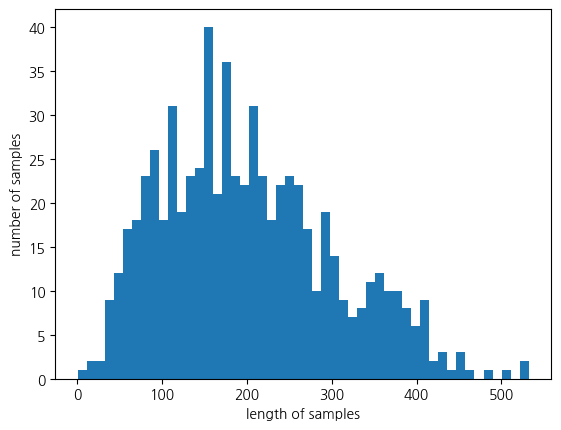

전체 샘플 중 길이가 400 이하인 샘플의 비율: 96.41791044776119


0      [1241, 134, 224, 647, 4529, 865, 1558, 141, 58...
1      [485, 67, 250, 246, 82, 149, 464, 496, 10, 313...
2      [4541, 3747, 2836, 1039, 2543, 211, 12, 2544, ...
3      [100, 2124, 589, 507, 71, 1418, 1109, 3748, 63...
4      [44, 96, 11, 591, 88, 324, 550, 1847, 2, 59, 5...
                             ...                        
665    [753, 126, 7, 502, 10, 2773, 3729, 164, 127, 1...
666    [4424, 2289, 1062, 180, 850, 1905, 616, 886, 1...
667    [834, 172, 392, 358, 465, 301, 2, 415, 1287, 2...
668    [39, 353, 296, 317, 14, 1, 267, 114, 69, 34, 3...
669    [1351, 250, 4528, 189, 447, 756, 175, 552, 205...
Name: int_encoding_pad, Length: 670, dtype: object

In [10]:
### 패딩 전 리뷰 벡터의 최대 길이 계산
print('리뷰의 최대 길이 :',max(len(review) for review in df['int_encoding']))
print('리뷰의 평균 길이 :',sum(map(len, df['int_encoding']))/len(df['int_encoding']))
plt.hist([len(review) for review in df['int_encoding']], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

### 전체 샘플 중 길이가 max_len 이하인 샘플의 비율을 확인하는 함수
def below_threshold_len(max_len, nested_list):
    count = 0
    for sentence in nested_list:
        if(len(sentence) <= max_len):
            count = count+1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

max_len = 400
below_threshold_len(max_len, df['int_encoding'])

### 패딩
from tensorflow.keras.preprocessing.sequence import pad_sequences
df['int_encoding_pad'] = pad_sequences(df['int_encoding'], maxlen=max_len, padding='post').tolist()
df['int_encoding_pad']

In [11]:
### X/y split
# X = df[['category','vectorized_reviews']]
X = np.array(df['int_encoding_pad'].tolist())
y = df['keyword2']
print(X.shape, y.shape)

### train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=2024
)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
rf = RandomForestClassifier(random_state=2024)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

### train evaluation
acc = accuracy_score(y_train, rf.predict(X_train))
f1 = f1_score(y_train, rf.predict(X_train), average='weighted')
print(f'정수 인코딩 train 정확도 : {acc:.4f}')
print(f'정수 인코딩 train f1 score : {f1:.4f}')
# 완전 과적합

### test evaluation
acc = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred, average='weighted')
print(f'정수 인코딩 test 정확도 : {acc:.4f}')
print(f'정수 인코딩 test f1 score : {f1:.4f}')

mtx = confusion_matrix(y_test, pred)
print(mtx)

(670, 400) (670,)
(536, 400) (134, 400) (536,) (134,)
정수 인코딩 train 정확도 : 1.0000
정수 인코딩 train f1 score : 1.0000
정수 인코딩 test 정확도 : 0.2463
정수 인코딩 test f1 score : 0.1648
[[ 4  0  0  0  0  0  0  0  0  0  0  0 13  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  1  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  3  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  8  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  2  0  0  7  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  3  1  0  0 11  0  2  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 7  0  0  0  0  0  0  0  0  4  0  0 28  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  4  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  3  0  0  0  6  0  0  0  0]
 [ 1  0  0  0  0  0  0  

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

X_train = torch.tensor(X_train, dtype=torch.long)
y_train = torch.tensor(y_train, dtype=torch.long)

embedding_dim = 100
hidden_units = 128

class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_units):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_units, batch_first=True)
        self.fc = nn.Linear(hidden_units, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.embedding(x)
        lstm_out, _ = self.lstm(x)
        lstm_out = lstm_out[:, -1, :]
        x = self.fc(lstm_out)
        x = self.sigmoid(x)
        return x

model = LSTMModel(vocab_size, embedding_dim, hidden_units)
criterion = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(model.parameters(), lr=0.01)

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

epochs = 5
for epoch in range(epochs):
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels.float())
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss / len(train_loader)}")

Epoch [1/5], Loss: 3294.4058837890625
Epoch [2/5], Loss: 3295.1348470052085
Epoch [3/5], Loss: 3295.2403157552085
Epoch [4/5], Loss: 3296.660902235243
Epoch [5/5], Loss: 3297.052252875434


In [13]:
def evaluate_model(model, dataloader):
    model.eval()  # 모델을 평가 모드로 설정
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in dataloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)  # 각 샘플별로 가장 높은 확률 값을 가진 클래스 선택
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    return accuracy

X_test = torch.tensor(X_test, dtype=torch.long)
y_test = torch.tensor(y_test.values)
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)

acc = evaluate_model(model, train_loader)
print('훈련 정확도 : %.4f' % acc)

acc = evaluate_model(model, test_loader)
print('테스트 정확도 : %.4f' % acc)

훈련 정확도 : 0.1493
테스트 정확도 : 0.1269


### 벡터화 - TF-IDF

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(tokenizer=okt.morphs, ngram_range=(1,2), min_df=3, max_df=0.9)
# ngram_range=(1,2) : unigram과 bigram 모두 사용
# min_df=3 : 최소 3개 이상의 문서에 단어가 등장해야 함
# max_df=0.9 : 특정 단어가 90% 이상의 문서에 등장하면 무시
tfidf_matrix = tfidf.fit_transform(df['clean_reviews'])

<670x17105 sparse matrix of type '<class 'numpy.float64'>'
	with 214630 stored elements in Compressed Sparse Row format>

In [14]:
### X/y split
X = tfidf_matrix
y = df['keyword2']
print(X.shape, y.shape)

### train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=2024
)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
rf = RandomForestClassifier(random_state=2024)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

### test evaluation
acc = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred, average='weighted')
print(f'정수 인코딩 test 정확도 : {acc:.4f}')
print(f'정수 인코딩 test f1 score : {f1:.4f}')

mtx = confusion_matrix(y_test, pred)
print(mtx)

(670, 17105) (670,)
(536, 17105) (134, 17105) (536,) (134,)
정수 인코딩 test 정확도 : 0.3433
정수 인코딩 test f1 score : 0.2339
[[ 9  0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  7  0  1  0  0]
 [ 1  0  0  0  0  0  0  0  0  3  0  0 14  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 5  0  0  0  0  0  0  0  0  0  0  0 34  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  9  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  2  0  0  3  0  0  0  0]
 [ 0  0  0  0  0  0  

### 벡터화 - Word2Vec

In [15]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=df['filtered_reviews'], vector_size=300,
                 window=5, min_count=1, workers=4)
print(model.wv.vectors.shape)  # 10136개의 단어, 300차원으로 구성

# '맛'과 유사한 단어
print(model.wv.most_similar('맛'))

# 유사도가 없는 단어 추출
print(model.wv.doesnt_match(df['filtered_reviews'][0]))

(10136, 300)
[('면', 0.9994948506355286), ('짜다', 0.9994930028915405), ('야채', 0.9993854761123657), ('볶음밥', 0.9993492960929871), ('적당하다', 0.9992755651473999), ('떡볶이', 0.9992684721946716), ('카레', 0.9992658495903015), ('양념', 0.9992560148239136), ('연어', 0.9992226362228394), ('주먹밥', 0.9992178082466125)]
퐁듀


10136
(10136, 300)
[-0.16237599  0.4216987  -0.1825567   0.22174878  0.17702718 -0.5857813
  0.28570762  1.0738788   0.28559715 -0.20800577]


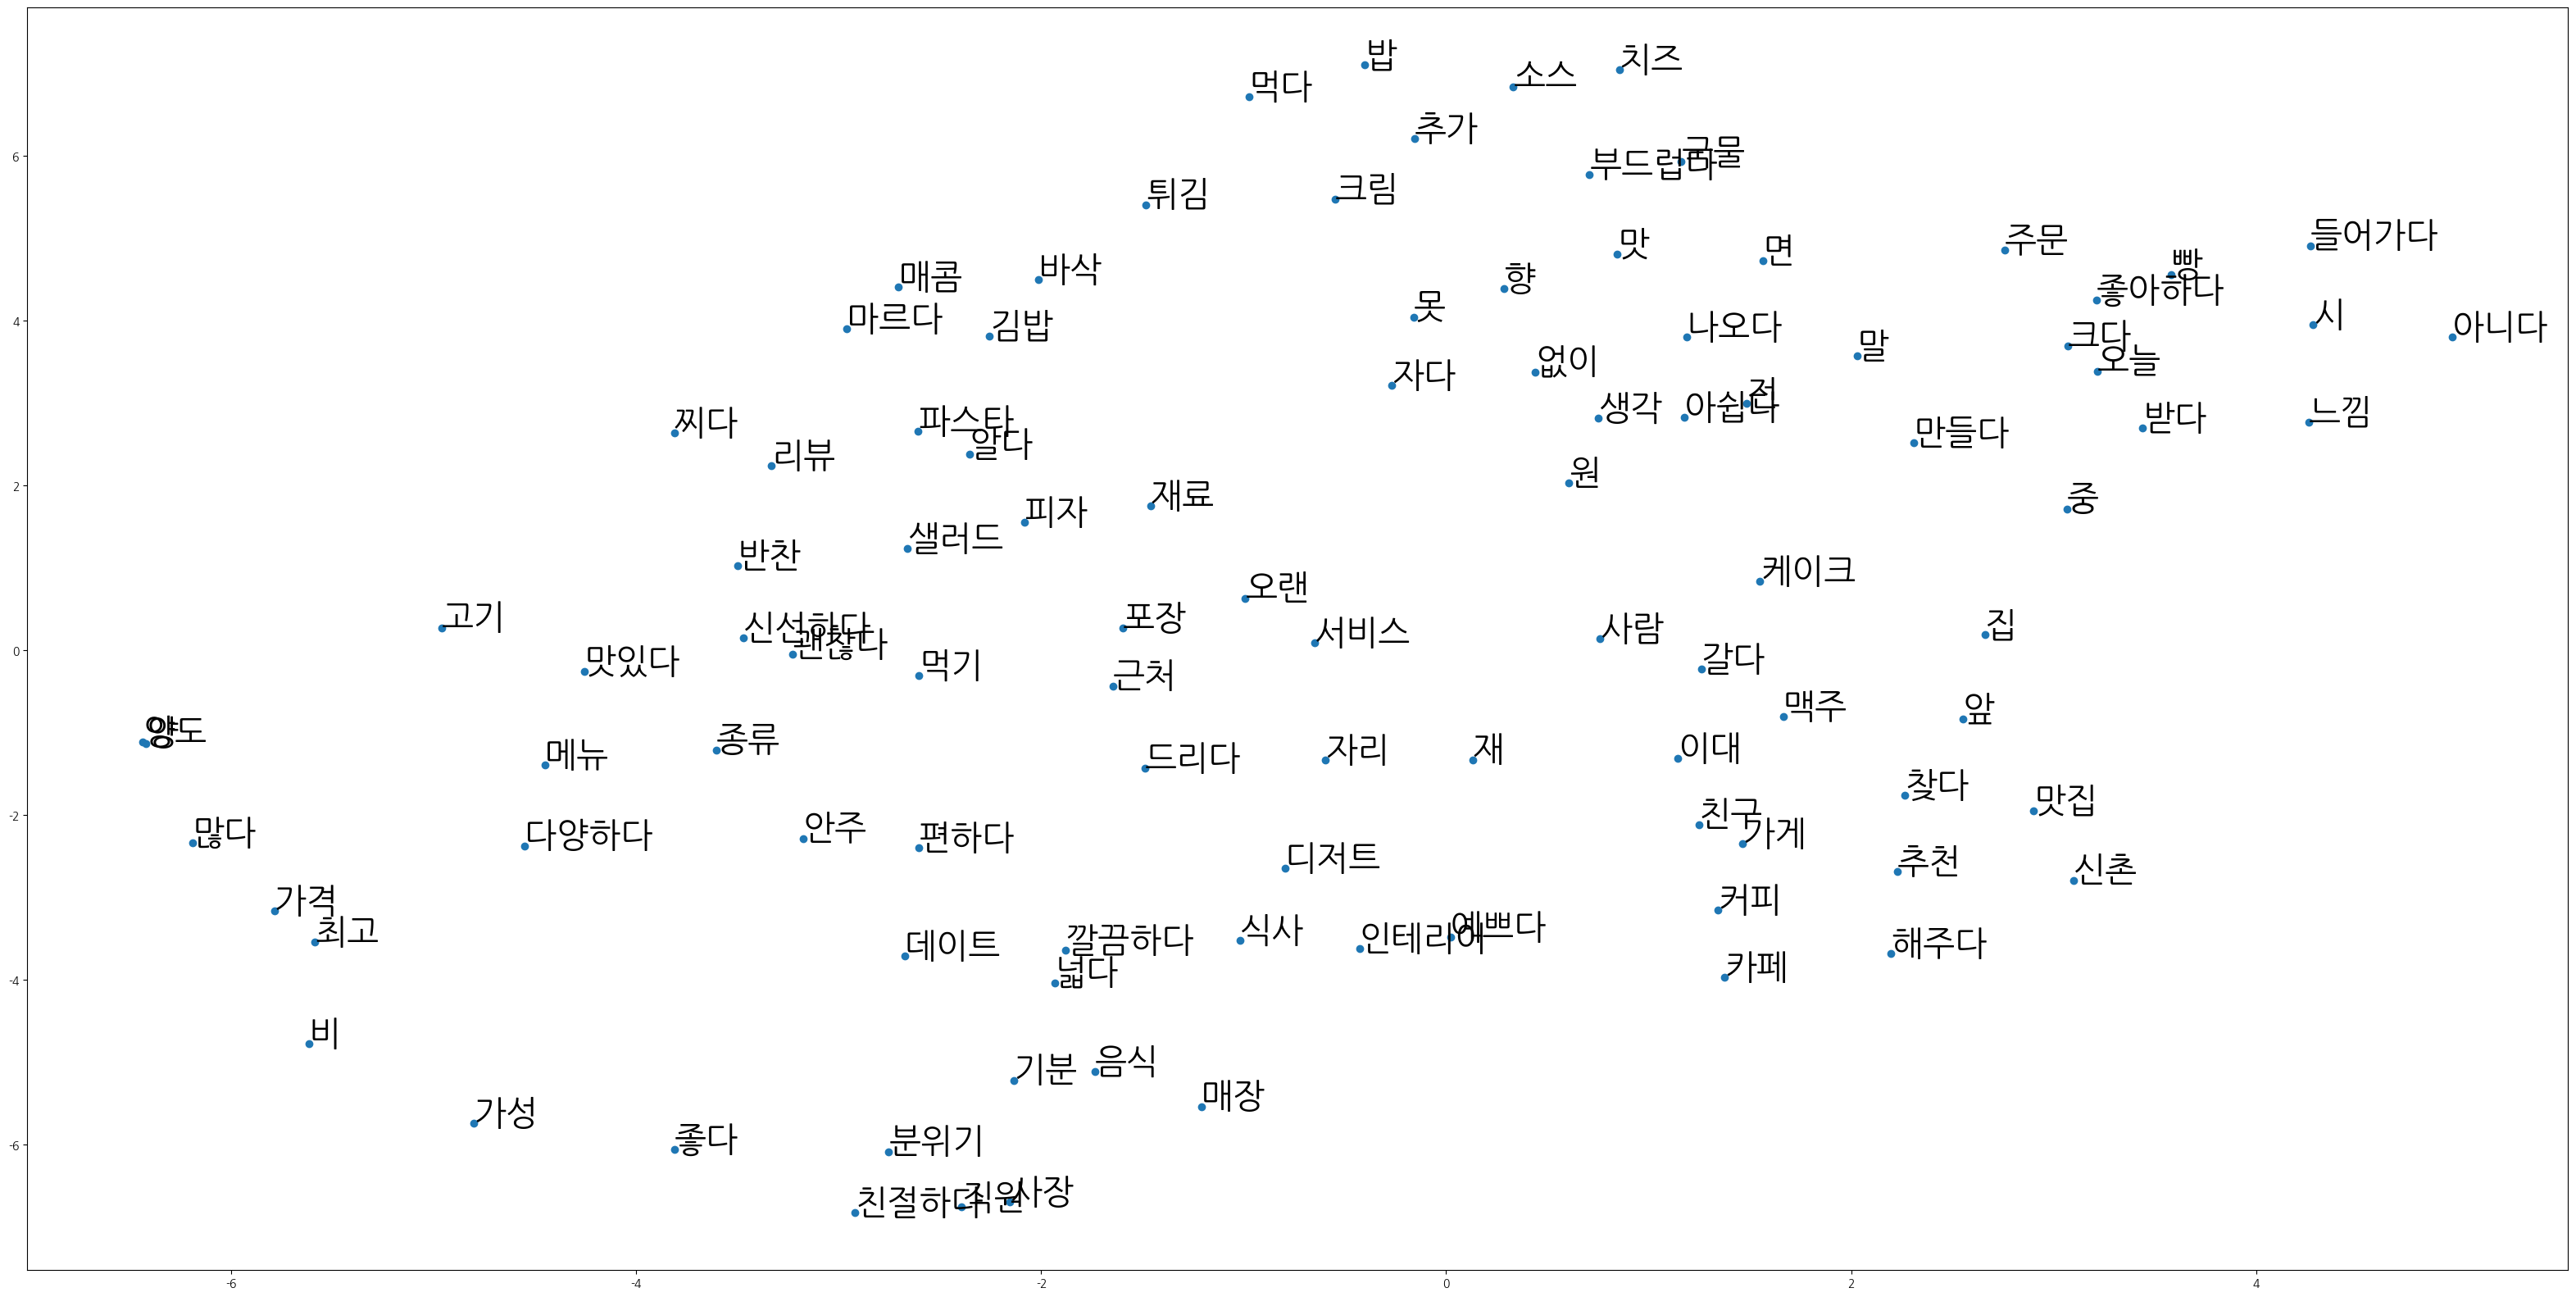

In [16]:
### t-SNE를 통해 유사도 시각화
from sklearn.manifold import TSNE
import matplotlib as mpl

# 단어와 인덱스를 매핑한 딕셔너리를 리스트로 저장
vocab = list(model.wv.key_to_index)
print(len(vocab))

# Word2Vec 모델에서 모든 단어 벡터를 포함한 Numpy 배열
X = model.wv.vectors
print(X.shape)
print(X[0][:10])

# 2차원으로 축소한 후 100개의 단어에 대해서만 시각화
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X[:100,:])

df_tsne = pd.DataFrame(X_tsne, index=vocab[:100], columns=['x','y'])
df_tsne.head()

# 시각화
fig = plt.figure()
fig.set_size_inches(40,20)
ax = fig.add_subplot(1,1,1)
ax.scatter(df_tsne['x'], df_tsne['y'])
for word, pos in df_tsne.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()

In [17]:
### 주어진 문장에서 단어 벡터의 평균을 구하는 함수
def makeFeatureVec(words, model, num_features):
    featureVec = np.zeros((num_features,), dtype='float32')  # 배열 초기화
    nwords = 0

    # 모델의 사전에 있는 단어며을 set 형태로 저장
    index2word_set = set(model.wv.key_to_index)

    # 모델 사전에 포함되는 단어만 피처에 추가
    for word in words:
        if word in index2word_set:
            nwords = nwords + 1
            featureVec = np.add(featureVec, model.wv.key_to_index[word])

    # 결과를 단어 수로 나누어 평균 계산
    featureVec = np.divide(featureVec, nwords)
    return featureVec

### 리뷰 단어 목록 각각에 대한 평균 벡터를 계산하여 2D numpy 배열을 반환하는 함수
def getAvgFeatureVecs(reviews, model, num_features):
    counter = 0
    reviewFeatureVecs = np.zeros((len(reviews), num_features), dtype='float32')

    for review in reviews:
        reviewFeatureVecs[int(counter)] = makeFeatureVec(review, model, num_features)
        counter = counter + 1

    return reviewFeatureVecs

vectorized_reviews = getAvgFeatureVecs(df['filtered_reviews'], model, num_features=300)
df['word2vec'] = vectorized_reviews.tolist()

In [18]:
### X/y split
# X = df[['category','vectorized_reviews']]
X = np.array(df['word2vec'].tolist())
y = df['keyword2']
print(X.shape, y.shape)

### train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=2024
)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
rf = RandomForestClassifier(random_state=2024)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

### test evaluation
acc = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred, average='weighted')
print(f'정수 인코딩 test 정확도 : {acc:.4f}')
print(f'정수 인코딩 test f1 score : {f1:.4f}')

mtx = confusion_matrix(y_test, pred)
print(mtx)

(670, 300) (670,)
(536, 300) (134, 300) (536,) (134,)
정수 인코딩 test 정확도 : 0.1343
정수 인코딩 test f1 score : 0.1357
[[ 5  3  1  0  0  0  1  0  0  0  1  0  0  4  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  2  0  0  0  0]
 [ 1  0  1  0  0  0  1  0  0  0  0  0  0  1  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  2  0  0  1  0  0  0  0]
 [ 1  0  0  0  0  0  0  1  0  1  1  0  0  3  1  1  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  1  1  0  0  0  0  0  0  0  1  0  0  2  1  0  1  0]
 [ 3  0  1  0  0  0  1  0  1  0  2  1  0  3  1  1  4  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  1  1  0  1  4  1  1  3  4  1  0 10  2  4  4  0]
 [ 1  0  0  0  0  0  2  0  0  0  1  0  0  1  0  0  0  0]
 [ 4  0  0  0  0  0  1  0  0  0  2  

### 벡터화 - FastText

In [19]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 1.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.1-py3-none-any.whl (238 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4246760 sha256=87f93afc0479822a2ef8fe0b068fdc73a6671523b0774be49af0f7c1c3b28163
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext


In [1]:
import fasttext
import fasttext.util

# fasttext.util.download_model('ko', if_exists='ignore')  # 한국어 모델 다운로드
# print('model downloaded successfully')
model = fasttext.load_model('cc.ko.300.bin')  # 다운로드한 모델 로드
# print('model loaded successfully')

def embed_text(text):
  return model.get_sentence_vector(text)

In [12]:
df['fasttext_reviews'] = df['clean_reviews'].apply(embed_text)
df['fasttext_reviews']

0      [-0.009264349, -0.0031784864, 0.03812067, 0.01...
1      [-0.009385516, -0.009497151, 0.04498714, 0.014...
2      [-0.00984222, -0.011184068, 0.048746854, 0.012...
3      [-0.0027759233, -0.006709498, 0.036055755, 0.0...
4      [-0.007829494, -0.011775758, 0.040782023, 0.01...
                             ...                        
665    [-0.008569071, -0.0055967886, 0.04232975, 0.02...
666    [-0.008433991, -0.008761337, 0.048193693, 0.01...
667    [-0.0067696385, -0.011714889, 0.051981624, 0.0...
668    [-0.01298075, -0.008615026, 0.04972776, 0.0120...
669    [-0.0070125205, -0.012039625, 0.032855343, 0.0...
Name: fasttext_reviews, Length: 670, dtype: object

In [18]:
X = np.array(df['fasttext_reviews']).tolist()
y = df['keyword2']

### train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=2024
)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
rf = RandomForestClassifier(random_state=2024)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

### test evaluation
acc = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred, average='weighted')
print(f'정수 인코딩 test 정확도 : {acc:.4f}')
print(f'정수 인코딩 test f1 score : {f1:.4f}')

mtx = confusion_matrix(y_test, pred)
print(mtx)

정수 인코딩 test 정확도 : 0.3209
정수 인코딩 test f1 score : 0.2351
[[ 2  0  0  0  0  0  0  0  0  1  0  0 13  0  0  1  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  0  0  0  2  0  0  0  0]
 [ 2  0  0  0  0  0  1  0  0  0  0  0  5  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  0  0  0  7  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  2  0  0 14  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 5  0  0  0  0  0  1  0  0  0  0  0 34  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  1  0  0  0  2  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  8  0  2  0  0]
 [ 1  0  0  0  0  0  0  0  0  2  0  0  4  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]]


### KoBERT → 완전 과적합

In [10]:
### 라이브러리 임포트
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import os
import re
import random
import tqdm
from torch.utils.data import TensorDataset, DataLoader
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [11]:
### 버트 토크나이저 내려받기
from transformers import BertTokenizer, BertForSequenceClassification
# 사전 훈련된 버트의 토크나이저 사용
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=23)
model.to(device)

### 텍스트 토큰화 및 패딩 함수
def preprocess_text(text_list):
    max_length = 512
    padded_list = []
    for text in text_list:
        encoded_text = bert_tokenizer.encode(text, add_special_tokens=True, max_length=max_length, truncation=True)
        padded_text = encoded_text + [0] * (max_length - len(encoded_text))
        padded_list.append(padded_text)
    return torch.tensor(padded_list)

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [12]:
### 데이터셋 정의
X = preprocess_text(df['clean_reviews'].tolist())
y = torch.tensor(df['keyword2'].tolist(), dtype=torch.long)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=2024
)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train, test_size=0.2, shuffle=False, random_state=2024
)

train_dataset = TensorDataset(X_train, y_train)
valid_dataset = TensorDataset(X_valid, y_valid)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=2, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False)

In [13]:
### 최적화 모델 저장
# 모델의 상태와 loss를 저장
def save_checkpoint(save_path, model, valid_loss):
    if save_path == None:
        return
    state_dict = {'model_state_dict': model.state_dict(),
                  'valid_loss': valid_loss}

    torch.save(state_dict, save_path)
    print(f'Model saved to ==> {save_path}')

# 모델의 체크포인트를 로드, loss 반환
def load_checkpoint(load_path, model):
    if load_path==None:
        return
    state_dict = torch.load(load_path, map_location=device)  # load_path에서 상태 딕셔너리 로드
    print(f'Model loaded from <== {load_path}')

    model.load_state_dict(state_dict['model_state_dict'])  # 로드한 파라미터를 모델에 적용
    return state_dict['valid_loss']

# 학습 및 검증 손실과 global step을 저장
def save_metrics(save_path, train_loss_list, valid_loss_list, global_steps_list):
    if save_path == None:
        return
    state_dict = {'train_loss_list': train_loss_list,
                  'valid_loss_list': valid_loss_list,
                  'global_steps_list': global_steps_list}
    torch.save(state_dict, save_path)
    print(f'Model saved to ==> {save_path}')

# 저장된 학습 metrics을 로드하여 반환
def load_metrics(load_path):
    if load_path==None:
        return
    state_dict = torch.load(load_path, map_location=device)
    print(f'Model loaded from <== {load_path}')
    return state_dict['train_loss_list'], state_dict['valid_loss_list'], state_dict['global_steps_list']

In [19]:
### 모델 훈련 함수 정의
def train(model, optimizer, criterion=nn.CrossEntropyLoss(),
          num_epochs=100, eval_every=len(train_loader)//2, best_valid_loss=float('Inf')):
  total_correct = 0.0
  total_len = 0.0
  running_loss = 0.0
  valid_running_loss = 0.0
  global_step = 0  # 전체 훈련 스텝 수
  train_loss_list = []
  valid_loss_list = []
  global_steps_list = []

  model.train()  # 모델을 훈련 모드로 설정
  for epoch in range(num_epochs):
      for text, labels in train_loader:
          optimizer.zero_grad()  # 옵티마이저 기울기 초기화
          text = text.to(device) # 디바이스 설정
          labels = labels.to(device)  # 라벨도 텐서로 변환
          outputs = model(text)   # 모델에 데이터 입력
          logits = outputs.logits  # BERT 모델의 출력은 .logits로 접근
          loss = criterion(logits, labels)

          pred = torch.argmax(F.softmax(logits), dim=1)  # 소프트맥스 함수로 예측 클래스 결정
          correct = pred.eq(labels)  # 예측이 실제 라벨과 일치하는지 확인
          total_correct += correct.sum().item()
          total_len += len(labels)
          running_loss += loss.item()
          loss.backward()  # 역전파
          optimizer.step()  # 옵티마이저 스텝
          global_step += 1  # 글로벌 스텝 증가

          if global_step % eval_every == 0:  # 일정 간격마다 검증 수해
              model.eval()  # 모델을 평가 모드로 설정
              with torch.no_grad():  # 평가 시 기울기 계산 비활성화
                  for text, labels in valid_loader:
                      text = text.to(device)
                      labels = labels.to(device)
                      outputs = model(text)
                      logits = outputs.logits
                      valid_running_loss += criterion(logits, labels).item()

              average_train_loss = running_loss / eval_every
              average_valid_loss = valid_running_loss / len(valid_loader)
              train_loss_list.append(average_train_loss)
              valid_loss_list.append(average_valid_loss)
              global_steps_list.append(global_step)

              running_loss = 0.0
              valid_running_loss = 0.0
              model.train()  # 모델 다시 훈련 모드로 전환

              print('Epoch [{}/{}], Step [{}/{}], Train Loss: {:.4f}, Valid Loss: {:.4f}'
                    .format(epoch+1, num_epochs, global_step, num_epochs*len(train_loader),
                            average_train_loss, average_valid_loss))

              if best_valid_loss > average_valid_loss:
                  best_valid_loss = average_valid_loss
                  save_checkpoint('./model.pt', model, best_valid_loss)
                  save_metrics('./metrics.pt', train_loss_list, valid_loss_list, global_steps_list)

  # 최종 메트릭 저장
  save_metrics('./metrics.pt', train_loss_list, valid_loss_list, global_steps_list)
  print('훈련 종료!')

In [20]:
### 모델 옵티마이저 설정 및 모델 훈련
optimizer = optim.RMSprop(model.parameters(), lr=2e-5)
train(model=model, optimizer=optimizer)

Epoch [1/100], Step [107/21400], Train Loss: 2.5243, Valid Loss: 2.6012
Model saved to ==> ./model.pt
Model saved to ==> ./metrics.pt
Epoch [1/100], Step [214/21400], Train Loss: 2.3956, Valid Loss: 2.5407
Model saved to ==> ./model.pt
Model saved to ==> ./metrics.pt
Epoch [2/100], Step [321/21400], Train Loss: 2.4384, Valid Loss: 2.5845
Epoch [2/100], Step [428/21400], Train Loss: 2.3780, Valid Loss: 2.6094
Epoch [3/100], Step [535/21400], Train Loss: 2.4165, Valid Loss: 2.6001
Epoch [3/100], Step [642/21400], Train Loss: 2.4056, Valid Loss: 2.6156
Epoch [4/100], Step [749/21400], Train Loss: 2.4122, Valid Loss: 2.6511
Epoch [4/100], Step [856/21400], Train Loss: 2.3990, Valid Loss: 2.6148
Epoch [5/100], Step [963/21400], Train Loss: 2.3438, Valid Loss: 2.6421
Epoch [5/100], Step [1070/21400], Train Loss: 2.4265, Valid Loss: 2.5822
Epoch [6/100], Step [1177/21400], Train Loss: 2.3207, Valid Loss: 2.6418
Epoch [6/100], Step [1284/21400], Train Loss: 2.4323, Valid Loss: 2.6397
Epoch [7/

Model loaded from <== metrics.pt


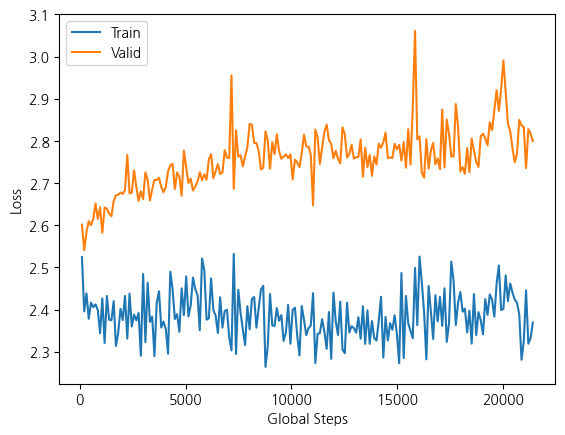

In [21]:
### 오차 그래프로 확인
train_loss_list, valid_loss_list, global_steps_list = load_metrics('metrics.pt')
plt.plot(global_steps_list, train_loss_list, label='Train')
plt.plot(global_steps_list, valid_loss_list, label='Valid')
plt.xlabel('Global Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
### 모델 평가 함수 정의
from sklearn.metrics import classification_report, confusion_matrix

def evaluate(model, test_loader):
    y_pred = []
    y_true = []

    model.eval()
    with torch.no_grad():
        for text, labels in test_loader:
            text = text.to(device)
            labels = labels.to(device)
            output = model(text)

            logits = output.logits  # 모델의 출력에서 로짓을 추출
            y_pred.extend(torch.argmax(logits, 1).tolist())
            y_true.extend(labels.tolist())

    print('Classification 결과:')
    print(classification_report(y_true, y_pred, labels=range(23), digits=4))

    cm = confusion_matrix(y_true, y_pred, labels=range(23))
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt="d")

    ax.set_title('Confusion Matrix')
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.set_xticklabels([str(i) for i in range(23)], rotation=45)
    ax.set_yticklabels([str(i) for i in range(23)], rotation=45)

Model loaded from <== model.pt
Classification 결과:
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        17
           1     0.0000    0.0000    0.0000         3
           2     0.0000    0.0000    0.0000         0
           3     0.0000    0.0000    0.0000         0
           4     0.0000    0.0000    0.0000         0
           5     0.0000    0.0000    0.0000         5
           6     0.0000    0.0000    0.0000         1
           7     0.0000    0.0000    0.0000         1
           8     0.0000    0.0000    0.0000         0
           9     0.0000    0.0000    0.0000         4
          10     0.0000    0.0000    0.0000         9
          11     0.0000    0.0000    0.0000         2
          12     0.0000    0.0000    0.0000         0
          13     0.0000    0.0000    0.0000         0
          14     0.0000    0.0000    0.0000         9
          15     0.0000    0.0000    0.0000        18
          16     0.0000    0.00

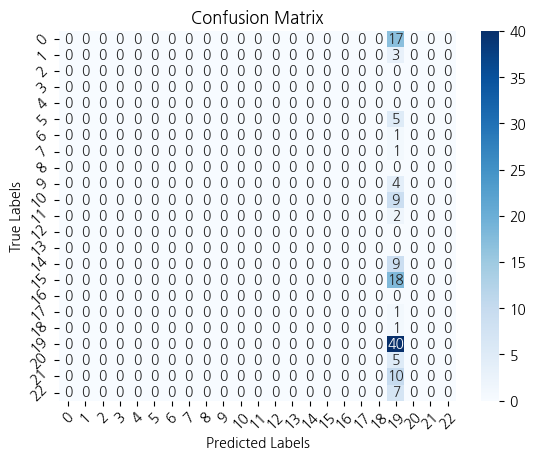

In [23]:
### 모델 평가
best_model = model.to(device)
load_checkpoint('model.pt', best_model)
evaluate(best_model, test_loader)